## VAR model

In [2]:
import statsmodels.api as sm

macro_econ_data = sm.datasets.macrodata.load_pandas().data
macro_econ_data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


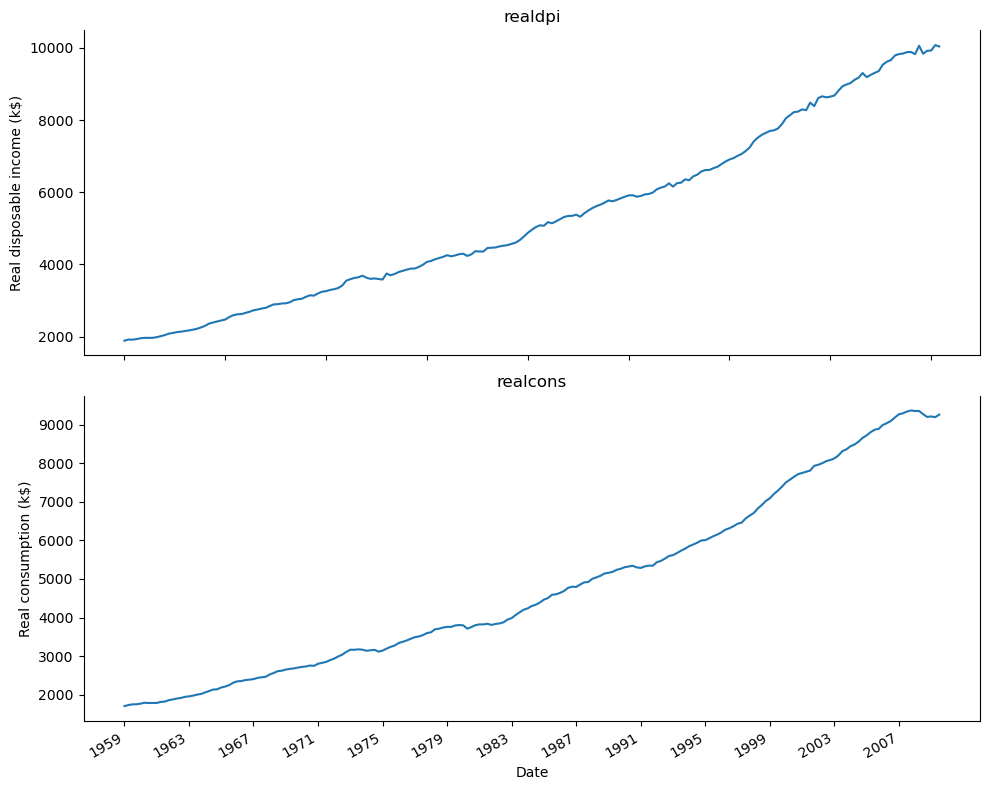

In [3]:
import matplotlib.pyplot as plt
import numpy as np


fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

ax1.plot(macro_econ_data["realdpi"])
ax1.set_xlabel("Date")
ax1.set_ylabel("Real disposable income (k$)")
ax1.set_title("realdpi")
ax1.spines["top"].set_alpha(0)

ax2.plot(macro_econ_data["realcons"])
ax2.set_xlabel("Date")
ax2.set_ylabel("Real consumption (k$)")
ax2.set_title("realcons")
ax2.spines["top"].set_alpha(0)

plt.xticks(np.arange(0, 208, 16), np.arange(1959, 2010, 4))

fig.autofmt_xdate()
plt.tight_layout()

In [5]:
from statsmodels.tsa.stattools import adfuller

ad_fuller_test_realdpi = adfuller(macro_econ_data["realdpi"])
print(f"ADF stats for realdpi: {ad_fuller_test_realdpi[0]}")
print(f"p-value for realdpi: {ad_fuller_test_realdpi[1]}\n----------------------")

ad_fuller_test_realcons = adfuller(macro_econ_data["realcons"])
print(f"ADF stats for realcons: {ad_fuller_test_realcons[0]}")
print(f"p-value for realcons: {ad_fuller_test_realcons[1]}")

ADF stats for realdpi: 2.986025351954683
p-value for realdpi: 1.0
----------------------
ADF stats for realcons: 1.549912338050964
p-value for realcons: 0.9976992503412904


In [6]:
ad_fuller_test_realdpi = adfuller(macro_econ_data["realdpi"].diff()[1:])
print(f"ADF stats for realdpi diff: {ad_fuller_test_realdpi[0]}")
print(f"p-value for realdpi diff: {ad_fuller_test_realdpi[1]}\n----------------------")

ad_fuller_test_realcons = adfuller(macro_econ_data["realcons"].diff()[1:])
print(f"ADF stats for realcons diff: {ad_fuller_test_realcons[0]}")
print(f"p-value for realcons diff: {ad_fuller_test_realcons[1]}")

ADF stats for realdpi diff: -8.864893340673007
p-value for realdpi diff: 1.4493606159108096e-14
----------------------
ADF stats for realcons diff: -4.204306080845247
p-value for realcons diff: 0.0006479282158627571


In [7]:
from typing import Union
from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.varmax import VARMAX
import pandas as pd


def optimize_VAR(endog: Union[pd.Series, list]) -> pd.DataFrame:

    results = []

    for i in tqdm(range(15)):
        try:
            model = VARMAX(endog, order=(i, 0)).fit(dips=False)
        
        except:
            continue

        aic = model.aic
        results.append([i, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ["p", "AIC"]

    result_df = result_df.sort_values(by="AIC", ascending=True).reset_index(drop=True)

    return result_df


In [8]:
endog = macro_econ_data[["realdpi", "realcons"]]

endog_diff = macro_econ_data[["realdpi", "realcons"]].diff()[1:]

train = endog_diff[:162]
test = endog_diff[162:]

result_df = optimize_VAR(train)
result_df

  0%|          | 0/15 [00:00<?, ?it/s]

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.61849D+00    |proj g|=  2.88206D-03

At iterate    5    f=  9.61847D+00    |proj g|=  2.89232D-03

At iterate   10    f=  9.61834D+00    |proj g|=  3.17861D-03

At iterate   15    f=  9.61833D+00    |proj g|=  2.08551D-03

At iterate   20    f=  9.61831D+00    |proj g|=  7.03835D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     21     25      1     0     0   7.094D-05   9.618D+00
  F =   9.6183127883602459     

CONVERG

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   15    f=  9.58061D+00    |proj g|=  7.55525D-04

At iterate   20    f=  9.58056D+00    |proj g|=  3.53029D-03

At iterate   25    f=  9.58054D+00    |proj g|=  3.50653D-04

At iterate   30    f=  9.58053D+00    |proj g|=  1.10827D-03

At iterate   35    f=  9.58053D+00    |proj g|=  9.92985D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     36     42      1     0     0   6.887D-05   9.581D+00
  F =   9.5805298399647540     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   15    f=  9.53435D+00    |proj g|=  6.18730D-04

At iterate   20    f=  9.53427D+00    |proj g|=  6.00981D-03

At iterate   25    f=  9.53419D+00    |proj g|=  2.10888D-04

At iterate   30    f=  9.53418D+00    |proj g|=  6.40105D-04

At iterate   35    f=  9.53417D+00    |proj g|=  2.56882D-04

At iterate   40    f=  9.53417D+00    |proj g|=  1.52614D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     43     48      1     0     0   6.356D-05   9.534D+00
  F =   9.5341668795529753     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  9.53073D+00    |proj g|=  3.37638D-03

At iterate   10    f=  9.52882D+00    |proj g|=  5.77359D-03

At iterate   15    f=  9.52872D+00    |proj g|=  1.19735D-03

At iterate   20    f=  9.52848D+00    |proj g|=  6.53568D-03

At iterate   25    f=  9.52841D+00    |proj g|=  3.15816D-04

At iterate   30    f=  9.52840D+00    |proj g|=  2.43450D-04

At iterate   35    f=  9.52839D+00    |proj g|=  1.11795D-03

At iterate   40    f=  9.52838D+00    |proj g|=  4.57500D-04

At iterate   45    f=  9.52838D+00    |proj g|=  8.44866D-05

At iterate   50    f=  9.52838D+00    |proj g|=  1.46362D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  9.49065D+00    |proj g|=  3.71658D-03

At iterate   10    f=  9.48825D+00    |proj g|=  2.28030D-02

At iterate   15    f=  9.48729D+00    |proj g|=  1.02704D-03

At iterate   20    f=  9.48716D+00    |proj g|=  6.60104D-03

At iterate   25    f=  9.48680D+00    |proj g|=  6.00199D-04

At iterate   30    f=  9.48679D+00    |proj g|=  7.33742D-04

At iterate   35    f=  9.48679D+00    |proj g|=  8.50875D-04

At iterate   40    f=  9.48676D+00    |proj g|=  1.74297D-03

At iterate   45    f=  9.48675D+00    |proj g|=  1.30257D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   25     45     52   

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  9.47727D+00    |proj g|=  4.35159D-03

At iterate   10    f=  9.47491D+00    |proj g|=  2.97491D-02

At iterate   15    f=  9.47252D+00    |proj g|=  1.25347D-03

At iterate   20    f=  9.47249D+00    |proj g|=  2.06330D-03

At iterate   25    f=  9.47196D+00    |proj g|=  8.01744D-03

At iterate   30    f=  9.47183D+00    |proj g|=  4.76183D-04

At iterate   35    f=  9.47182D+00    |proj g|=  1.12443D-03

At iterate   40    f=  9.47181D+00    |proj g|=  1.76836D-03

At iterate   45    f=  9.47179D+00    |proj g|=  1.36119D-03

At iterate   50    f=  9.47178D+00    |proj g|=  8.88573D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           33     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.47542D+00    |proj g|=  3.72657D-02

At iterate    5    f=  9.47478D+00    |proj g|=  5.08595D-03

At iterate   10    f=  9.47087D+00    |proj g|=  2.26393D-02

At iterate   15    f=  9.46827D+00    |proj g|=  1.86587D-03

At iterate   20    f=  9.46823D+00    |proj g|=  1.91933D-03

At iterate   25    f=  9.46766D+00    |proj g|=  1.74471D-02

At iterate   30    f=  9.46737D+00    |proj g|=  1.13666D-03

At iterate   35    f=  9.46733D+00    |proj g|=  2.53988D-03

At iterate   40    f=  9.46732D+00    |proj g|=  4.80074D-04

At iterate   45    f=  9.46729D+00    |proj g|=  1.73823D-03


/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   50    f=  9.46728D+00    |proj g|=  4.88986D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   33     50     55      1     0     0   4.890D-04   9.467D+00
  F =   9.4672786172008276     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           37     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.46504D+00    |proj g|=  4.42335D-02

At iterate    5    f=  9.46428D+00    |proj g|=  5.80453D-03

At iterate   10    f=  9.46011D+00    |proj g|=  5.15624D-02

At iter

/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           41     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.45353D+00    |proj g|=  5.78193D-02

At iterate    5    f=  9.45232D+00    |proj g|=  6.38271D-03

At iterate   10    f=  9.44644D+00    |proj g|=  4.04969D-02

At iterate   15    f=  9.44123D+00    |proj g|=  7.94196D-03

At iterate   20    f=  9.44106D+00    |proj g|=  1.85465D-03

At iterate   25    f=  9.44073D+00    |proj g|=  1.38197D-02

At iterate   30    f=  9.43957D+00    |proj g|=  3.90617D-03

At iterate   35    f=  9.43951D+00    |proj g|=  2.84469D-03

At iterate   40    f=  9.43944D+00    |proj g|=  1.22643D-03

At iterate   45    f=  9.43944D+00    |proj g|=  8.90640D-04


/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(



At iterate   50    f=  9.43940D+00    |proj g|=  3.79646D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   41     50     60      1     0     0   3.796D-03   9.439D+00
  F =   9.4394048660040166     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           45     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.45560D+00    |proj g|=  5.40566D-02

At iterate    5    f=  9.45433D+00    |proj g|=  7.10478D-03

At iterate   10    f=  9.44765D+00    |proj g|=  5.61136D-02

At iterate   15    f=  9.44028D+00    |proj g|=  6.79435D-03

At iterate   20    f=  9.44003D+00    |proj g|=  2.12372D-03

At iterate   25    f=  9.43938D+00    |proj g|=  1.05835D-02

At iterate   30    f=  9.43818D+00    |proj g|=  1.88866D-03

At iterate   35    f=  9.43804D+00    |proj g|=  5.13862D-03

At iterate   40    f=  9.43793D+00    |proj g|=  7.98210D-04

At iterate   45    f=  9.43789D+00    |proj g|=  2.57974D-03


/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(



At iterate   50    f=  9.43777D+00    |proj g|=  1.52833D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   45     50     56      1     0     0   1.528D-03   9.438D+00
  F =   9.4377745437468139     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           49     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.45195D+00    |proj g|=  5.62485D-02


 This problem is unconstrained.



At iterate    5    f=  9.45066D+00    |proj g|=  7.75022D-03

At iterate   10    f=  9.44280D+00    |proj g|=  4.86367D-02

At iterate   15    f=  9.43455D+00    |proj g|=  1.22417D-02

At iterate   20    f=  9.43304D+00    |proj g|=  2.39843D-03

At iterate   25    f=  9.43281D+00    |proj g|=  9.88920D-03

At iterate   30    f=  9.43078D+00    |proj g|=  1.44771D-02

At iterate   35    f=  9.43052D+00    |proj g|=  1.01798D-03

At iterate   40    f=  9.43051D+00    |proj g|=  1.46061D-03

At iterate   45    f=  9.43042D+00    |proj g|=  1.27175D-03


/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(



At iterate   50    f=  9.43042D+00    |proj g|=  6.82673D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   49     50     56      1     0     0   6.827D-04   9.430D+00
  F =   9.4304163408103729     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           53     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.44479D+00    |proj g|=  5.90407D-02


 This problem is unconstrained.



At iterate    5    f=  9.44350D+00    |proj g|=  8.47563D-03

At iterate   10    f=  9.43594D+00    |proj g|=  7.22625D-02

At iterate   15    f=  9.42532D+00    |proj g|=  2.94046D-02

At iterate   20    f=  9.42206D+00    |proj g|=  5.14442D-03

At iterate   25    f=  9.42186D+00    |proj g|=  5.32506D-03

At iterate   30    f=  9.42124D+00    |proj g|=  8.61589D-03

At iterate   35    f=  9.42043D+00    |proj g|=  8.07952D-03

At iterate   40    f=  9.41991D+00    |proj g|=  2.52846D-02

At iterate   45    f=  9.41893D+00    |proj g|=  8.11334D-03


/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(



At iterate   50    f=  9.41884D+00    |proj g|=  1.45633D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   53     50     57      1     0     0   1.456D-03   9.419D+00
  F =   9.4188425510892557     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           57     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.44502D+00    |proj g|=  6.32966D-02

At iterate    5    f=  9.44359D+00    |proj g|=  9.20343D-03

At iterate   10    f=  9.43572D+00    |proj g|=  6.09596D-02

At iterate   15    f=  9.42402D+00    |proj g|=  2.01438D-02

At iterate   20    f=  9.41891D+00    |proj g|=  9.92047D-03

At iterate   25    f=  9.41771D+00    |proj g|=  4.92783D-03

At iterate   30    f=  9.41759D+00    |proj g|=  6.75581D-03

At iterate   35    f=  9.41676D+00    |proj g|=  1.88047D-02

At iterate   40    f=  9.41482D+00    |proj g|=  6.31419D-03

At iterate   45    f=  9.41415D+00    |proj g|=  5.47631D-03


/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dips. After release 0.14, this will raise.
  warnings.warn(



At iterate   50    f=  9.41388D+00    |proj g|=  1.58735D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   57     50     58      1     0     0   1.587D-03   9.414D+00
  F =   9.4138785688640176     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           61     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.43457D+00    |proj g|=  5.90786D-02


 This problem is unconstrained.



At iterate    5    f=  9.43308D+00    |proj g|=  1.01136D-02

At iterate   10    f=  9.42938D+00    |proj g|=  3.46585D-02

At iterate   15    f=  9.41121D+00    |proj g|=  5.62184D-02

At iterate   20    f=  9.40522D+00    |proj g|=  3.44056D-02

At iterate   25    f=  9.40284D+00    |proj g|=  1.18679D-02

At iterate   30    f=  9.40268D+00    |proj g|=  3.17947D-03

At iterate   35    f=  9.40192D+00    |proj g|=  1.39421D-02

At iterate   40    f=  9.39858D+00    |proj g|=  1.44590D-02

At iterate   45    f=  9.39821D+00    |proj g|=  1.29912D-03


/home/alexa/miniconda3/envs/timeseriesML/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  9.39819D+00    |proj g|=  1.32832D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   61     50     58      1     0     0   1.328D-03   9.398D+00
  F =   9.3981913035563451     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


,p,AIC
0,3,3123.070069
1,5,3123.708523
2,6,3126.855596
3,4,3129.194025
4,2,3130.091668
5,7,3133.398272
6,1,3134.333343
7,8,3137.149015
8,9,3140.367177
9,10,3147.838952


In [10]:
from statsmodels.tsa.stattools import grangercausalitytests

granger_cons_dpi = grangercausalitytests(macro_econ_data[["realdpi", "realcons"]].diff()[1:], [3])
granger_dpi_cons = grangercausalitytests(macro_econ_data[["realcons", "realdpi"]].diff()[1:], [3])




Granger Causality
number of lags (no zero) 3
ssr based F test:         F=9.2363  , p=0.0000  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=28.7191 , p=0.0000  , df=3
likelihood ratio test: chi2=26.8268 , p=0.0000  , df=3
parameter F test:         F=9.2363  , p=0.0000  , df_denom=192, df_num=3

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8181  , p=0.0403  , df_denom=192, df_num=3
ssr based chi2 test:   chi2=8.7625  , p=0.0326  , df=3
likelihood ratio test: chi2=8.5751  , p=0.0355  , df=3
parameter F test:         F=2.8181  , p=0.0403  , df_denom=192, df_num=3


In [11]:
best_model = VARMAX(train, order=(3, 0))
best_model_fit = best_model.fit(disp=False)

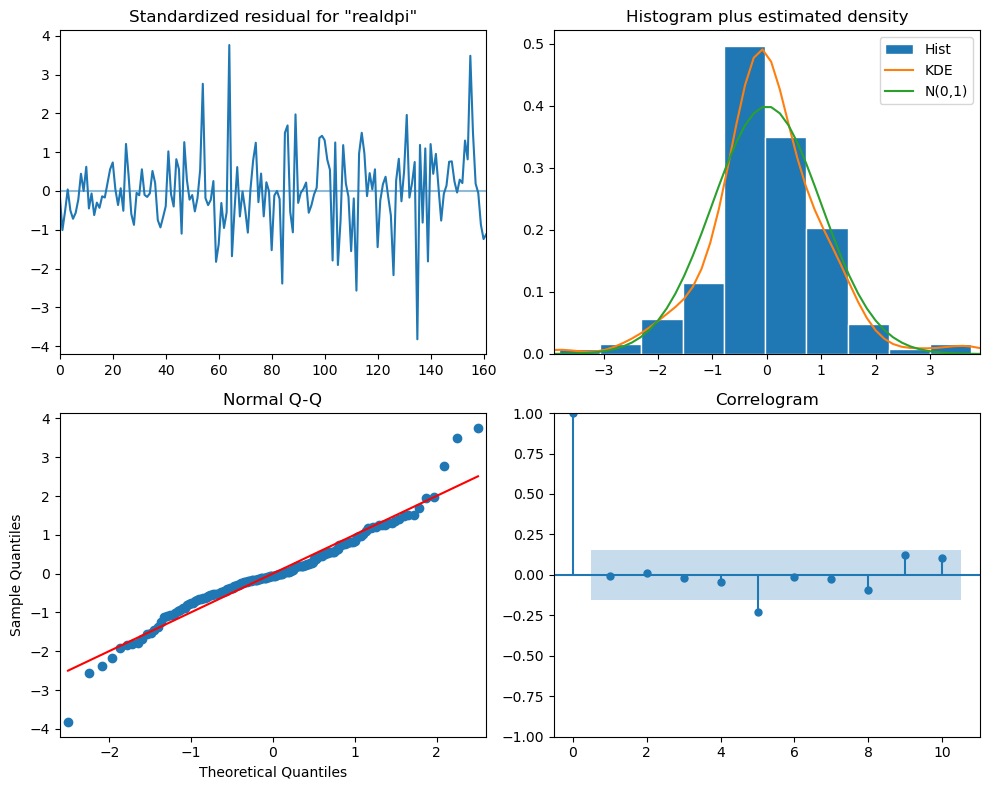

In [12]:
best_model_fit.plot_diagnostics(figsize=(10, 8), variable=0)
plt.tight_layout()

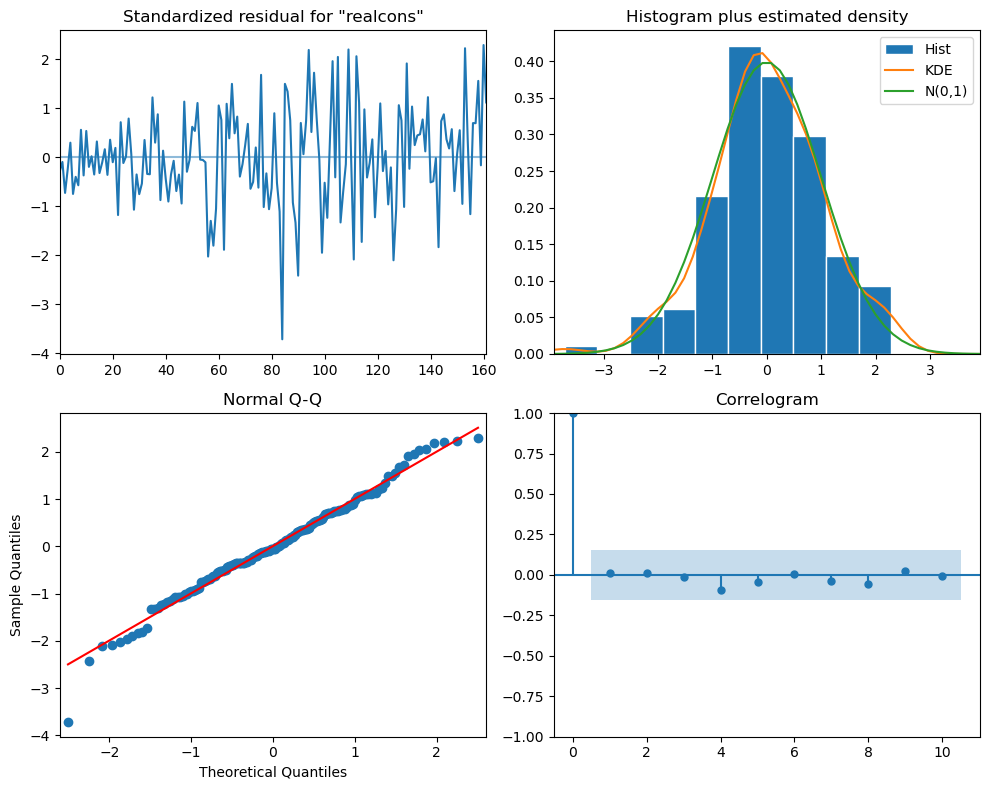

In [13]:
best_model_fit.plot_diagnostics(figsize=(10, 8), variable=1)
plt.tight_layout()